<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_NBA_Fantasy_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv ('NBA2019.csv')

In [167]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
703,704,Tyler Zeller\zellety01,C,29,MEM,4,1,82,16,28,0.571,0,0,NaN,16,28,0.571,0.571,14,18,0.778,9,9,18,3,1,3,4,16,46
704,705,Ante Žižić\zizican01,C,22,CLE,59,25,1082,183,331,0.553,0,0,NaN,183,331,0.553,0.553,93,132,0.705,108,212,320,53,13,22,61,113,459
705,706,Ivica Zubac\zubaciv01,C,21,TOT,59,37,1040,212,379,0.559,0,0,NaN,212,379,0.559,0.559,101,126,0.802,115,247,362,63,14,51,70,137,525
706,707,Ivica Zubac\zubaciv01,C,21,LAL,33,12,516,112,193,0.580,0,0,NaN,112,193,0.580,0.580,57,66,0.864,54,108,162,25,4,27,33,73,281
707,708,Ivica Zubac\zubaciv01,C,21,LAC,26,25,524,100,186,0.538,0,0,NaN,100,186,0.538,0.538,44,60,0.733,61,139,200,38,10,24,37,64,244


In [168]:
df.columns.values

array(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'], dtype=object)

In [0]:
cols = ['Player', 'Pos', 'G', 'MP', 'FG%', 'FT%', '3P', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
vals = ['G', 'MP', 'FG%', 'FT%', '3P', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
cats = ['FG%', 'FT%', '3P', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
strs = ['Player', 'Pos', 'G']

In [0]:
df = df[~df['Player'].duplicated()] # removed duplicates, kept only totals see Zubac
df = df [cols] # kept only nine category for fantasy

In [0]:
df = df [df['G'] >= 60] # kept only people that played 60+ games, this is arbitrary

In [172]:
df.shape

(239, 13)

In [0]:
scaler = StandardScaler ()

In [0]:
scaler.fit (df[cats])
scaled_df = scaler.transform (df[cats])

In [0]:
norm = pd.DataFrame (scaled_df, columns=cats)

In [0]:
names = df [strs].reset_index()

In [0]:
final = names.join (norm)

In [0]:
games = 82

In [0]:
final = final.iloc[:,1:]
final['TOV'] = -1 * final['TOV']
final['FAN'] = final[cats].sum(axis=1) * final['G']/games

In [180]:
final.head()

,Player,Pos,G,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,FAN
0,Steven Adams\adamsst01,C,80,2.010832,-3.033326,-1.375404,0.478013,2.074904,-0.477445,1.953409,1.098301,-0.482014,2.192460
1,Bam Adebayo\adebaba01,C,82,1.713303,-0.385659,-1.330146,-0.343645,1.249877,-0.048812,0.402139,0.776904,-0.256886,1.777075
2,LaMarcus Aldridge\aldrila01,C,81,0.820713,0.876207,-1.224545,1.819983,1.993919,0.022627,-0.542112,2.004057,-0.626739,5.081378
3,Jarrett Allen\allenja01,C,80,1.932535,-0.678593,-1.284888,-0.031458,1.629490,-0.577459,-0.542112,2.383890,0.032565,2.794117
4,Al-Farouq Aminu\aminual01,PF,81,-0.526001,1.101541,0.072841,-0.276438,1.315676,-0.620322,0.300969,-0.158070,0.531063,1.720025


In [0]:
final.sort_values (by='FAN', ascending=False, inplace=True)

In [204]:
final.head(24) # first two rounds

,Player,Pos,G,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,FAN
96,James Harden\hardeja01,PG,78,-0.385066,1.236741,4.327061,4.185231,0.850017,2.823030,3.336062,0.572378,-4.534322,11.805712
81,Paul George\georgpa01,SF,77,-0.447703,0.786074,3.029675,2.756543,1.406784,0.908469,3.740741,-0.128852,-1.607655,9.807241
84,Rudy Gobert\goberru01,C,81,3.169633,-1.501059,-1.375404,0.859575,3.497189,-0.213121,0.233523,4.341492,-0.401611,8.505215
218,Karl-Anthony Towns\townska01,C,77,0.805054,0.752274,0.766792,2.151681,3.056838,0.486980,0.267246,2.529980,-2.170476,8.119151
15,Bradley Beal\bealbr01,SG,82,0.131697,0.436807,1.777547,2.626465,0.308435,1.837174,2.088302,0.572378,-1.913186,7.865619
127,Nikola Jokić\jokicni01,C,80,0.695437,0.583274,-0.123275,1.553323,2.606363,2.780167,1.649900,0.484724,-2.299120,7.737359
225,Nikola Vučević\vucevni01,C,80,0.805054,0.222741,-0.108189,1.685569,3.087207,0.829886,0.739372,1.478134,-0.867948,7.679829
146,Damian Lillard\lillada01,PG,80,-0.353747,1.608541,2.199951,2.557090,0.105974,2.572994,0.975434,-0.128852,-1.720219,7.626505
227,Kemba Walker\walkeke02,PG,82,-0.510341,0.842407,2.546927,2.632969,0.055359,2.094354,1.447560,-0.128852,-1.704139,7.276244
56,Stephen Curry\curryst01,PG,69,0.084718,1.653607,3.965000,2.153849,0.095851,1.215656,1.110328,-0.391814,-1.398607,7.142837


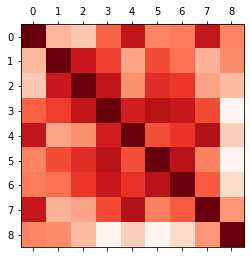

In [205]:
plt.matshow(final[cats].corr(), cmap='Reds') # https://matplotlib.org/3.1.3/gallery/images_contours_and_fields/image_annotated_heatmap.html
plt.show() 